# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).


Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important? 
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

##### More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

In [1]:
import pandas as pd
import math
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')

In [3]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_dropna = df.dropna()
df_survived = df_dropna.loc[df_dropna['Survived'] == 1]
df_not_survived = df_dropna.loc[df_dropna['Survived'] == 0]

In [5]:
stats.describe(df_survived['Age'])

DescribeResult(nobs=123, minmax=(0.92, 80.0), mean=32.905853658536586, variance=221.71546053578567, skewness=0.11036517600265433, kurtosis=0.031225201077919262)

In [6]:
stats.describe(df_not_survived['Age'])

DescribeResult(nobs=60, minmax=(2.0, 71.0), mean=41.35, variance=247.73135593220334, skewness=-0.30756108127889464, kurtosis=-0.2764299013556979)

(array([ 8.,  6., 25., 21., 30., 12., 14.,  6.,  0.,  1.]),
 array([ 0.92 ,  8.828, 16.736, 24.644, 32.552, 40.46 , 48.368, 56.276,
        64.184, 72.092, 80.   ]),
 <a list of 10 Patch objects>)

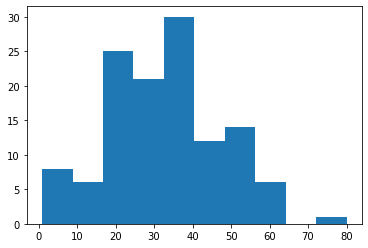

In [8]:
plt.hist(df_survived['Age'])

(array([ 2.,  0.,  5.,  8.,  7.,  7., 15.,  6.,  6.,  4.]),
 array([ 2. ,  8.9, 15.8, 22.7, 29.6, 36.5, 43.4, 50.3, 57.2, 64.1, 71. ]),
 <a list of 10 Patch objects>)

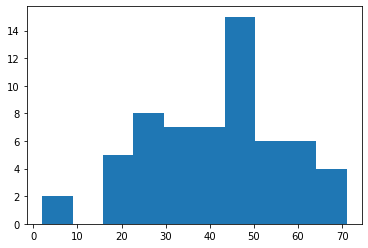

In [9]:
plt.hist(df_not_survived['Age'])

In [10]:
# H0: On average, passenges tha did not survive were the same age as passengers that did survive
# Ha: On average, the age of passengers that did survive was different than the average age of passengers the did not
stats.ttest_ind(df_not_survived['Age'], df_survived['Age']) 

Ttest_indResult(statistic=3.53435125095576, pvalue=0.0005189503307881672)

In [11]:
def get_95_ci(data1, data2):
    data1_mean = data1.mean()
    data2_mean = data2.mean()
    n1 = len(data1)
    n2 = len(data2)
    v1 = data1.var()
    v2 = data2.var()
    z = 1.96
    mean_diff = data2_mean - data1_mean
    margin_of_error = math.sqrt((v1/n1) + (v2/n2))*z
    c_lower = mean_diff - margin_of_error
    c_upper = mean_diff + margin_of_error
    return f'95% confidence interval: {c_lower}, {c_upper}'

data2 = df_not_survived['Age']
data1 = df_survived['Age']
get_95_ci(data1, data2)

'95% confidence interval: 3.670662752222926, 13.217629930703906'

### Is there a correlation between fare price and survival? Again, is this difference statistically important?

In [21]:
df_survived = df.loc[df['Survived'] == 1]
df_not_survived = df.loc[df['Survived'] == 0]
stats.describe(df_survived['Fare'])

DescribeResult(nobs=342, minmax=(0.0, 512.3292), mean=48.39540760233918, variance=4435.160158368154, skewness=3.8458166819167294, kurtosis=20.343694359915972)

In [22]:
stats.normaltest(df_survived['Fare'])

NormaltestResult(statistic=310.50821173969666, pvalue=3.749717312272261e-68)

In [14]:
stats.describe(df_not_survived['Fare'])

DescribeResult(nobs=549, minmax=(0.0, 263.0), mean=22.117886885245902, variance=985.2195092053387, skewness=4.540690741165962, kurtosis=26.12023942326097)

In [23]:
stats.normaltest(df_not_survived['Fare'])

NormaltestResult(statistic=542.7161174365979, pvalue=1.4147916196682132e-118)

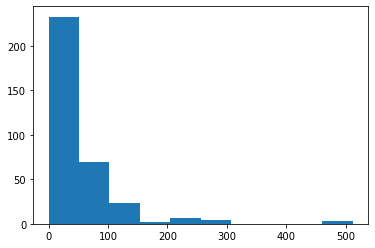

In [15]:
plt.hist(df_survived['Fare'])
plt.show()

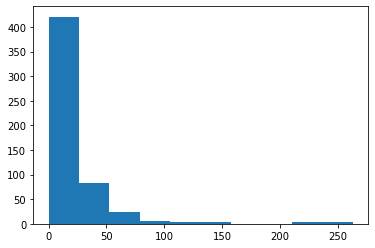

In [16]:
plt.hist(df_not_survived['Fare'])
plt.show()

In [17]:
stats.ttest_ind(df_not_survived['Fare'], df_survived['Fare']) 

Ttest_indResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15)

In [18]:
data1 = df_not_survived['Fare']
data2 = df_survived['Fare']
get_95_ci(data1, data2)

'95% confidence interval: 18.746713127616722, 33.80832830656986'

In [ ]:
# low p-value would mean a signifficat result but the data is not normally distributed
# when the NaN values were dropped the data showed a higher p-value
# (0.07), we wanted to see if the dropped NaN values presented a difference in the data that was presented.
